# Introduction

We will adhere to a series of essential procedures that can enhance our analysis to produce a reliable trading strategy through machine learning. Our first move will be to delve into the **Financial Bars** concepts.

Instead of relying on traditional time bars, we will investigate dollar/tick/volume bars to structure our financial data. By grouping transactions based on a fixed dollar/tick/volume amount, we can reduce noise in the data and enhance our ability to identify meaningful patterns.

# Financial Data Structures

Before determining the most suitable structure to use, we will look into the various data structures available and the statistical properties they possess.

Financial data structures consist of **time, tick, volume, and dollar bars**. Time bars are based on predetermined time intervals, such as a minute or an hour, and reveal trading activities. Tick bars, on the other hand, display a specific number of trades that have occurred in each bar, for example, 100 trades. Volume bars are structured based on the total number of shares traded, such as a bar that represents 10,000 shares traded. Dollar bars are based on the total dollar value of shares traded and showcase the opening, closing, high, and low prices for trades executed in each bar. 

Tick bars are more frequently sampled as the number of trades increases, while volume bars are more regularly sampled as the traded volume increases. However, tick bars may not accurately reflect fluctuating asset values due to repetitive or manipulative trades. Therefore, volume bars may be more suitable as they only consider the total volume traded. However, dollar bars can alternatively be used as they measure the fiat value of shares exchanged, avoiding the problem of misleading repetitive trades.

Dollar bars are often viewed as more informative than other bar types because they offer a more comprehensive view of market activity and can more efficiently document times of high volatility. One advantage of dollar bars is their ability to diminish the influence of extraneous factors on financial data; in contrast, time-based bars may be subject to faulty signals due to low trading activity or market closures. As dollar bars are established utilizing tangible trading activity, they are more resilient to this type of interference.

# Financial Data Structures with RiskLabAI

The aim of this notebook is to serve as a guide to help users connect ideas to their actual implementation. It will specifically focus on creating different financial data structures and formatting data for use in quantitative algorithms.

To demonstrate the process, we used sample tick data in `ahrom_edited.csv` file.

## Import packages

In [3]:
include("controller/data_structure_controller.jl");
using DataFrames
using CSV
using Dates
using PlotlyJS
using TimeSeries, Pipe
using HypothesisTests
using Statistics
using KernelDensityEstimate


In [4]:
data = DataFrame(CSV.File("../ahrom_edited.csv"))
data.date = DateTime.(data.date, "yyyy/mm/dd H:M:S.s");

first(data, 5)

5×3 DataFrame
 Row │ date                 price    volume  
     │ DateTime             Float64  Float64 
─────┼───────────────────────────────────────
   1 │ 2022-06-01T09:05:25  13170.0   5000.0
   2 │ 2022-06-01T09:06:38  13170.0    500.0
   3 │ 2022-06-01T09:06:38  13180.0   5000.0
   4 │ 2022-06-01T09:06:38  13190.0   4500.0
   5 │ 2022-06-01T09:08:09  13180.0    440.0

# Financial Data Structures Using RiskLabAI

In the second step, we construct different data structures. While our emphasis is on the standard bars in this notebook, the information-driven bars are also at our disposal.

## Dollar Bars

In [5]:
dollar = handleInput(
    "DollarStandardBars",
    Dict(
        Symbol("threshold") => 60_000_000_000.0
    ),
    data,
    batchSize=1_000_000,  
) 

dollar

batch 1 with size 729726

2713×12 DataFrame
  Row │ Date Time            Tick Number  Open     High     Low      Close     ⋯
      │ DateTime             Int64        Float64  Float64  Float64  Float64   ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │ 2022-06-01T11:53:13          361  13170.0    NaN      NaN    13100.0   ⋯
    2 │ 2022-06-06T09:54:16          724  13100.0  13200.0  12220.0  12460.0
    3 │ 2022-06-07T09:29:29         1242  12460.0  12770.0  12260.0  12520.0
    4 │ 2022-06-07T12:00:43         1599  12520.0  12700.0  12300.0  12350.0
    5 │ 2022-06-08T10:15:23         1911  12330.0  12750.0  12300.0  12600.0   ⋯
    6 │ 2022-06-11T09:40:38         2290  12600.0  12690.0  12320.0  12340.0
    7 │ 2022-06-11T10:12:58         2477  12320.0  12410.0  12210.0  12210.0
    8 │ 2022-06-11T10:32:09         2626  12210.0  12400.0  12210.0  12400.0
  ⋮   │          ⋮                ⋮          ⋮        ⋮        ⋮        ⋮      ⋱
 2707 │ 2023-03-29T12:12:43       728438  22410.0  22520.0  22400.0  22430.0   ⋯
 2708 │ 2023-03-29T12:17:56       728643  22430.0  22600.0  22430.0  22600.0
 2709 │ 2023-03-29T12:22:19       728865  22600.0  22630.0  22550.0  22630.0
 2710 │ 2023-03-29T12:24:03       729057  22630.0  22700.0  22630.0  22700.0
 2711 │ 2023-03-29T12:25:39       729207  22700.0  22730.0  22670.0  22730.0   ⋯
 2712 │ 2023-03-29T12:27:20       729413  22730.0  22810.0  22730.0  22810.0
 2713 │ 2023-03-29T12:29:14       729610  22810.0  22820.0  22750.0  22750.0
                                                 6 columns and 2698 rows omitted

## Volume Bars

In [6]:
volume = handleInput(
    "VolumeStandardBars",
    Dict(
        Symbol("threshold") => 3_500_000.0
    ),
    data,
    batchSize=1_000_000,  
) 

volume

batch 1 with size 729726

3139×12 DataFrame
  Row │ Date Time            Tick Number  Open     High     Low      Close     ⋯
      │ DateTime             Int64        Float64  Float64  Float64  Float64   ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │ 2022-06-01T11:29:18          290  13170.0    NaN      NaN    13100.0   ⋯
    2 │ 2022-06-06T09:15:54          538  13130.0  13200.0  12800.0  12800.0
    3 │ 2022-06-06T10:57:27          902  12800.0  12890.0  12220.0  12270.0
    4 │ 2022-06-07T09:29:28         1241  12260.0  12770.0  12260.0  12510.0
    5 │ 2022-06-07T10:41:14         1441  12520.0  12700.0  12480.0  12500.0   ⋯
    6 │ 2022-06-08T09:20:16         1766  12500.0  12750.0  12300.0  12570.0
    7 │ 2022-06-08T10:21:56         1942  12570.0  12700.0  12470.0  12630.0
    8 │ 2022-06-11T09:31:21         2270  12640.0  12690.0  12320.0  12420.0
  ⋮   │          ⋮                ⋮          ⋮        ⋮        ⋮        ⋮      ⋱
 3133 │ 2023-03-29T12:03:28       728043  22390.0  22500.0  22360.0  22440.0   ⋯
 3134 │ 2023-03-29T12:10:38       728356  22440.0  22500.0  22400.0  22500.0
 3135 │ 2023-03-29T12:17:51       728637  22510.0  22600.0  22430.0  22600.0
 3136 │ 2023-03-29T12:22:58       728922  22600.0  22650.0  22550.0  22650.0
 3137 │ 2023-03-29T12:24:52       729128  22650.0  22700.0  22630.0  22690.0   ⋯
 3138 │ 2023-03-29T12:26:52       729369  22700.0  22800.0  22690.0  22800.0
 3139 │ 2023-03-29T12:29:20       729632  22800.0  22820.0  22750.0  22760.0
                                                 6 columns and 3124 rows omitted

## Tick Bars

In [7]:
tick = handleInput(
    "TickStandardBars",
    Dict(
        Symbol("threshold") => 250.0
    ),
    data,
    batchSize=1_000_000,  
) 

tick

batch 1 with size 729726

2918×12 DataFrame
  Row │ Date Time            Tick Number  Open     High     Low      Close     ⋯
      │ DateTime             Int64        Float64  Float64  Float64  Float64   ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │ 2022-06-01T11:01:24          250  13170.0    NaN      NaN    13080.0   ⋯
    2 │ 2022-06-06T09:09:27          500  13080.0  13200.0  12870.0  12880.0
    3 │ 2022-06-06T10:04:43          750  12880.0  12890.0  12220.0  12470.0
    4 │ 2022-06-06T11:43:39         1000  12490.0  12580.0  12260.0  12380.0
    5 │ 2022-06-07T09:32:17         1250  12380.0  12770.0  12300.0  12530.0   ⋯
    6 │ 2022-06-07T11:26:23         1500  12530.0  12700.0  12430.0  12460.0
    7 │ 2022-06-08T09:18:18         1750  12460.0  12750.0  12300.0  12570.0
    8 │ 2022-06-08T10:58:02         2000  12590.0  12700.0  12420.0  12550.0
  ⋮   │          ⋮                ⋮          ⋮        ⋮        ⋮        ⋮      ⋱
 2912 │ 2023-03-29T12:02:54       728000  22470.0  22500.0  22410.0  22480.0   ⋯
 2913 │ 2023-03-29T12:08:51       728250  22460.0  22470.0  22400.0  22470.0
 2914 │ 2023-03-29T12:14:54       728500  22470.0  22520.0  22430.0  22480.0
 2915 │ 2023-03-29T12:20:35       728750  22480.0  22600.0  22480.0  22560.0
 2916 │ 2023-03-29T12:23:48       729000  22550.0  22700.0  22550.0  22700.0   ⋯
 2917 │ 2023-03-29T12:26:01       729250  22700.0  22750.0  22630.0  22750.0
 2918 │ 2023-03-29T12:28:18       729500  22750.0  22820.0  22750.0  22780.0
                                                 6 columns and 2903 rows omitted

## Time Bars

In [8]:
time = handleInput(
    "TimeBars",
    Dict(
        Symbol("resolutionType") => "MIN",
        Symbol("resolutionUnits") => 10

    ),
    data,
    batchSize=1_000_000,  
) 

time

batch 1 with size 729726

4123×12 DataFrame
  Row │ Date Time            Tick Number  Open     High     Low      Close     ⋯
      │ DateTime             Int64        Float64  Float64  Float64  Float64   ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │ 2022-06-01T09:13:00            8  13170.0    NaN      NaN    13060.0   ⋯
    2 │ 2022-06-01T09:22:31           41  13060.0  13100.0  12980.0  13000.0
    3 │ 2022-06-01T09:33:09           56  12960.0  12970.0  12900.0  12910.0
    4 │ 2022-06-01T09:41:25           94  12910.0  12980.0  12850.0  12980.0
    5 │ 2022-06-01T09:50:45          102  12900.0  12950.0  12890.0  12950.0   ⋯
    6 │ 2022-06-01T10:00:30          115  12950.0  12990.0  12910.0  12920.0
    7 │ 2022-06-01T10:10:37          138  12900.0  12990.0  12880.0  12990.0
    8 │ 2022-06-01T10:20:33          189  12990.0  13390.0  12990.0  13040.0
  ⋮   │          ⋮                ⋮          ⋮        ⋮        ⋮        ⋮      ⋱
 4117 │ 2023-03-29T11:20:01       725566  22340.0  22450.0  22340.0  22410.0   ⋯
 4118 │ 2023-03-29T11:30:04       726189  22420.0  22610.0  22320.0  22570.0
 4119 │ 2023-03-29T11:40:03       726916  22560.0  22740.0  22460.0  22660.0
 4120 │ 2023-03-29T11:50:02       727477  22660.0  22680.0  22480.0  22500.0
 4121 │ 2023-03-29T12:00:02       727918  22500.0  22570.0  22350.0  22460.0   ⋯
 4122 │ 2023-03-29T12:10:01       728304  22470.0  22500.0  22400.0  22460.0
 4123 │ 2023-03-29T12:20:00       728718  22450.0  22600.0  22430.0  22550.0
                                                 6 columns and 4108 rows omitted

## Stability

In [9]:
function resample(df::DataFrame, on::Symbol, resultColumn::Symbol; dateColumnSymbol::Symbol=:date, period=week, how=length)
    df = @pipe df |>
          transform(_,
              dateColumnSymbol => ByRow(year) => :year,
              dateColumnSymbol => ByRow(month) => :month,
              dateColumnSymbol => ByRow(week) => :week,
          ) |>
          groupby(_, [:month, :year]) |>
          combine(_, on => length => resultColumn)

    sort!(df, [:year, :month])

    return df
end

timeCount = resample(time, :Close, :Time, dateColumnSymbol=Symbol("Date Time"), period=month, how=length)
dollarCount = resample(dollar, :Close, :Dollar, dateColumnSymbol=Symbol("Date Time"), period=month, how=length)
volumeCount = resample(volume, :Close, :Volume, dateColumnSymbol=Symbol("Date Time"), period=month, how=length)
tickCount = resample(tick, :Close, :Tick, dateColumnSymbol=Symbol("Date Time"), period=month, how=length);

countDfColumns = [timeCount, tickCount, volumeCount, dollarCount]

countDf = reduce((x, y) -> innerjoin(x, y, on=[:month, :year]), countDfColumns);
countDf

10×6 DataFrame
 Row │ month  year   Time   Tick   Volume  Dollar 
     │ Int64  Int64  Int64  Int64  Int64   Int64  
─────┼────────────────────────────────────────────
   1 │     6   2022    397     59      62      46
   2 │     7   2022    409     48      34      22
   3 │     8   2022    443     72      74      47
   4 │     9   2022    351     47      36      21
   5 │    10   2022    460     60      51      27
   6 │    11   2022    462    230     259     155
   7 │    12   2022    422    399     503     348
   8 │     1   2023    465    726     787     625
   9 │     2   2023    356    431     526     483
  10 │     3   2023    358    846     807     939

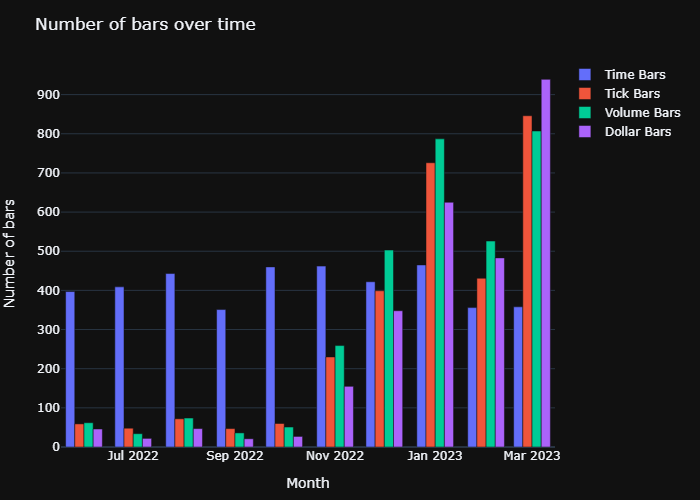

In [10]:
templates.default = "plotly_dark"

yearAndMonth = string.(countDf[!, :year]) .* "-" .* string.(countDf[!, :month])
plot(
    [bar(countDf, y=y, x=yearAndMonth, name="$(String(y)) Bars") for y in propertynames(countDf)[3:end]],
    Layout(title="Number of bars over time",
        width=900,
        height=600,
        xaxis_title="Month",
        yaxis_title="Number of bars",))

# Normality

The Jarque-Bera test is an assessment of how well a dataset's skewness and kurtosis match a normal distribution. Its main use is to test the assumption of normality in residuals during regression analysis, and its test statistic is determined by multiplying the sample size by the skewness and kurtosis of the sample.

Another common test used for normality is the Shapiro-Wilk test. It checks if a dataset is normally distributed by comparing the observed distribution to the expected distribution under the assumption of normality. The test statistic is derived from the differences between observed and expected values squared.

Both tests are employed to determine if a dataset could have been drawn from a normal distribution, but the Shapiro-Wilk test is usually regarded as more accurate, particularly for smaller datasets. Furthermore, while the Jarque-Bera test only accounts for skewness and kurtosis, the Shapiro-Wilk test considers the entire distribution.

It is best practice to combine these two tests with other diagnostic tools to fully evaluate whether a dataset can be reasonably assumed to be drawn from a normal distribution.

## Jarque-Bera Test

In [11]:
log_return(array) = @pipe array |> log.(_) |> diff |> filter(!ismissing, _)

time_returns = log_return(time.Close)
tick_returns = log_return(tick.Close) 
volume_returns = log_return(volume.Close)
dollar_returns = log_return(dollar.Close);

In [12]:
JarqueBeraTest(time_returns).JB 

101850.60746454087

In [13]:
JarqueBeraTest(tick_returns).JB

25589.69611378676

In [14]:
JarqueBeraTest(volume_returns).JB

32583.19019793489

In [15]:
JarqueBeraTest(dollar_returns).JB

22870.717622468477

If the Jarque-Bera test statistic is lower, it indicates that the returns are more normally distributed. In this instance, the time bars had the highest test statistic, whereas volume bars had the lowest, and dollar bars were in the middle. Surprisingly, the volume bars had a skewness and kurtosis closest to that of a normal distribution, despite the Jarque-Bera test only accounting for these factors.

With regards to the Shapiro-Wilk test, the closer the test statistic is to 1, the more it approximates a normal distribution. Once more, we can see that both volume and dollar bars show an improvement from time bars.

## Results KDE plot 

#### Standardize Data

In [16]:
standardize(array) = (array .- mean(array)) ./ std(array)

time_standard = time_returns |> standardize;
tick_standard = tick_returns |> standardize;
volume_standard = volume_returns |> standardize;
dollar_standard = dollar_returns |> standardize;

### Distribution Plot

┌ Warning: evaluateDualTree vector evaluation API is changing for single point evaluation across multiple dimensions rather than assuming multiple points on a univariate kde.
└ @ KernelDensityEstimate C:\Users\HP\.julia\packages\KernelDensityEstimate\bzXUf\src\DualTree01.jl:400
┌ Warning: evaluateDualTree vector evaluation API is changing for single point evaluation across multiple dimensions rather than assuming multiple points on a univariate kde.
└ @ KernelDensityEstimate C:\Users\HP\.julia\packages\KernelDensityEstimate\bzXUf\src\DualTree01.jl:400


┌ Warning: evaluateDualTree vector evaluation API is changing for single point evaluation across multiple dimensions rather than assuming multiple points on a univariate kde.
└ @ KernelDensityEstimate C:\Users\HP\.julia\packages\KernelDensityEstimate\bzXUf\src\DualTree01.jl:400


┌ Warning: evaluateDualTree vector evaluation API is changing for single point evaluation across multiple dimensions rather than assuming multiple points on a univariate kde.
└ @ KernelDensityEstimate C:\Users\HP\.julia\packages\KernelDensityEstimate\bzXUf\src\DualTree01.jl:400


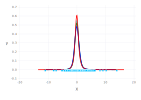

In [17]:
time_standard_kde = kde!(time_standard)
tick_standard_kde = kde!(tick_standard)
volume_standard_kde = kde!(volume_standard)
dollar_standard_kde = kde!(dollar_standard)

using KernelDensityEstimatePlotting

KernelDensityEstimatePlotting.plot(
    [time_standard_kde; tick_standard_kde; volume_standard_kde; dollar_standard_kde],
    c=["red"; "blue"; "green"; "cyan"]
) # using Gadfly under the hood